In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
%matplotlib inline

data = pd.read_csv('CMP3744M_ADM_Assignment 1_Task2 - dataset - plants.csv')
stem_length = np.array(list(data['stem_length']))
stem_diameter = np.array(list(data['stem_diameter']))
leaf_length = np.array(list(data['leaf_length']))
leaf_width = np.array(list(data['leaf_width']))

x = np.concatenate((stem_length, leaf_length), axis=None)
y = np.concatenate((stem_diameter, leaf_width), axis=None)
dataset = np.column_stack((x, y))

stemset = np.column_stack((stem_length, stem_diameter))
leafset = np.column_stack((leaf_length, leaf_width))

n1 = len(stem_length) # length of stemset of leafset
n = n1 * 2 # length of datasets put together

def compute_euclidean_distance(vec_1, vec_2):
    # your code comes here
    # find distance between centroid and point
    # vec_1 is the centroid, while vec_2 is the point
    # sqrt((x1 - x2)^2 - (y1 - y2)^2)
    distance = np.linalg.norm(vec_1-vec_2)
    return distance

def initialise_centroids(dataset, k):
    # your code comes here
    # centroids[i] = [x, y]
    centroids = dataset[np.random.randint(dataset.shape[0], size=k), :]
    return centroids

def kmeans(dataset, k):
    # iterate through each point, computing euclidean distance between each randomly initalised centroid and the point
    # distance is compared with each centroid, and point is assigned to the closest centroid
    cluster_assigned = np.zeros(n) # array to store cluster assignments and add to dataset when algorithm is complete
    points_per_cluster = np.zeros(k) # array to store number of data points for each centroid
    xytot_per_cluster = np.zeros((k, 2)) # stores the total x any y for all points in a cluster
    dis_total = np.zeros(k) # array to store total distance for each centroid's cluster 
    
    maxstep = 100
    step = 0
    while step < maxstep: # or (step > 50 and var == min(obj_func))
        # centroids are initialised using appropriate function, returned as array that has k rows and 2 columns of x and y            
        centroids = initialise_centroids(dataset, k)
        new_centroids = np.zeros((k, 2)) # for comparison of new and old centroids

        done = False    
        while done == False: # kmeans function runs until new and old centroids are equal 
            var = 0 # stores sum of squared euclidean distance of every cluster
            i = 0 # i is for iterating through each point
            while i < n: # iterate through each point until n is reached
                point = np.array([dataset[i][0], dataset[i][1]]) # set point of interest
                dis_array = np.zeros(k) # create array to store distances between the point and centroids
            
                u = 0 # u is for iterating through each centroid
                while u < k: # iterate through to k in order to calculate each distance and store in an array
                    distance = compute_euclidean_distance(centroids[u], point) # compute distance between point and centroid
                    dis_array[u] = distance # store distances in array
                    u+=1
            
                u = 0 # u is for iterating through each distance in this case
                while u < k: # iterate through to k in order to compare each distance
                    if dis_array[u] == min(dis_array): # if distance u is smallest
                        cluster_assigned[i] = u+1 # add assigned cluster to cluster_assigned array
                        xytot_per_cluster[u] = xytot_per_cluster[u] + point # so far adding up x and y values in each cluster to find the mean in each 
                        points_per_cluster[u] = points_per_cluster[u] + 1
                        dis_total[u] = dis_total[u] + min(dis_array)
                        var = var + min(dis_array)**2
                    u+=1
                i+=1  
        
            u = 0 # u is for iterating through each centroid
            while u < k: # iterate through to k to assign new centroids based on mean of points in each cluster
                new_centroids[u] = xytot_per_cluster[u] / points_per_cluster[u] # find mean of x and y values for each cluster
                u+=1
            
            dis_total.fill(0) # reset all dis_total values to 0 for next step
            points_per_cluster.fill(0) # reset all points_per_centroid values to 0 for next step
            xytot_per_cluster.fill(0)
            
            if centroids.all() == new_centroids.all():
                done = True
            else:
                centroids = new_centroids        

        if step == 0: # if and else statements to store the objective function in each step
            obj_func = np.array(var)
            cluster_assigned_steps = np.array(cluster_assigned) # create array of cluster assignments in each step to be combined with the dataset   
            centroid_steps = np.array(centroids.flatten()) # create array to store centroids from each step
        else:
            obj_func = np.append(obj_func, var)
            cluster_assigned_steps = np.vstack([cluster_assigned_steps, cluster_assigned])
            centroid_steps = np.vstack([centroid_steps, centroids.flatten()])
        step+=1
    
    i = 0
    while i < step: # iterate through each step
        if obj_func[i] == min(obj_func): # find if the step holds the minimum objective function
            optimal_step = i # assign the optimal step
        i+=1

    u = 0
    while u < k*2:
        centroid = np.array([centroid_steps[optimal_step][u], centroid_steps[optimal_step][u+1]])
        if u == 0:
            centroids = np.array(centroid)
        else:
            centroids = np.vstack([centroids, centroid])
        u+=2
    
    cluster_assigned = cluster_assigned_steps[optimal_step] # use optimal step variable to assign best cluster set
    clustered_dataset = np.column_stack((dataset, cluster_assigned)) # add cluster_assigned as a column to new dataset
   
    # stem scatter plot :
    plt.figure(1)
    
    colors = {0:'k',1:'b',2:'g',3:'y',4:'m'} # denotes cluster colours
    center_color = ['r'] # denotes centroid colour as red    
    
    #leafset = clustered_dataset[:-n1, :] # delete first n1 rows of clustered_dataset to get leafset for plotting
    stemset = clustered_dataset[n1:, :] # delete last n1 rows of clustered_dataset to get stemset for plotting

    plt.scatter(stemset[:,0], stemset[:,1], c=stemset[:,2], alpha=0.5)
    plt.scatter(centroids[:,0],centroids[:,1], alpha=1, color=center_color[0])

    plt.title("stem clusters to centroids of the dataset")
    plt.xlabel("stem length (cm)")
    plt.ylabel("stem diameter (cm)")
    
    # line plot :
    plt.figure(2)
    
    its = list(range(step))
    
    plt.plot(its, obj_func)
    
    plt.title("line plot of each step")
    plt.xlabel("iteration step")
    plt.ylabel("objective function")
    
    return centroids, cluster_assigned

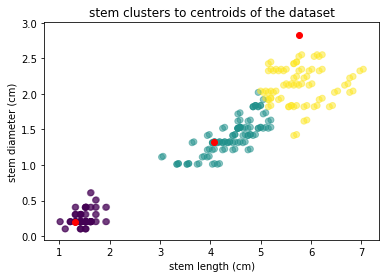

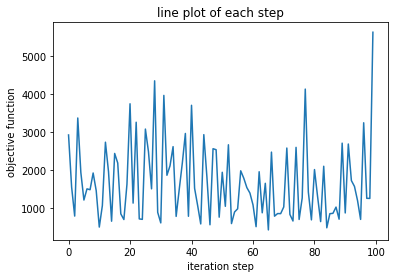

In [6]:
centroids_k3, cluster_assigned_k3 = kmeans(dataset, 3) # implement kmeans function (k=3) to get centroids and cluster values

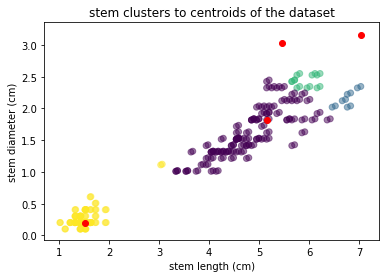

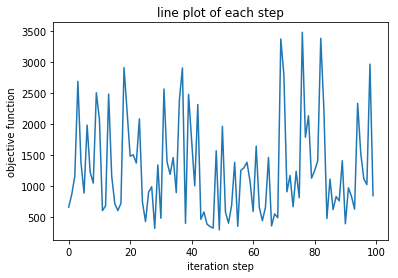

In [7]:
centroids_k4, cluster_assigned_k4 = kmeans(dataset, 4) # implement kmeans function (k=4) to get centroids and cluster values